In [1]:
import os
os.chdir('../..')
os.getcwd()

'd:\\Shaukat ali khan\\programming\\courses\\Innovista-etech-bootcamp\\assignments\\machine-learning\\1'

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('datasets/without-ols.csv')
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,BsmtFin SF 2_0,Low Qual Fin SF_0
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,140,0,6,2010,WD,Normal,105000,1,1
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,393,36,6,2010,WD,Normal,172000,0,1
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,212,34,3,2010,WD,Normal,189900,0,1
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,360,36,6,2010,WD,Normal,195500,0,1
4,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,0,4,2010,WD,Normal,213500,0,1


In [6]:
obj_cols = [colname for colname in df.columns if df[colname].dtype == 'O']
print(len(obj_cols))
obj_cols

38


['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


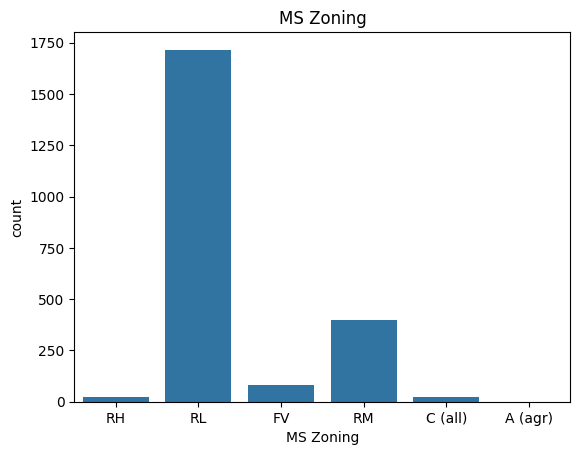

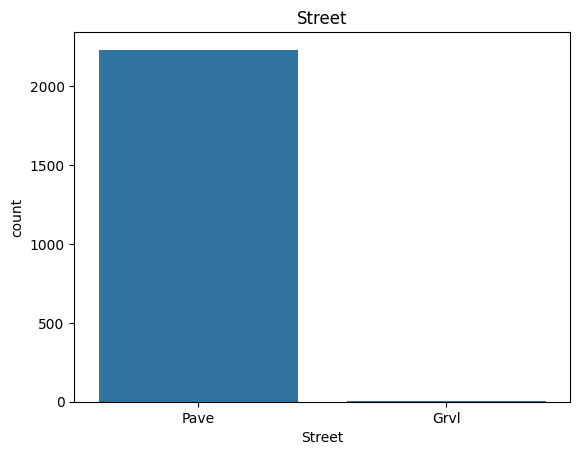

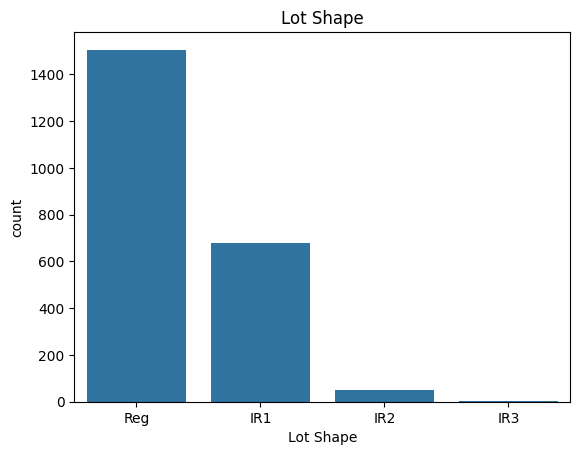

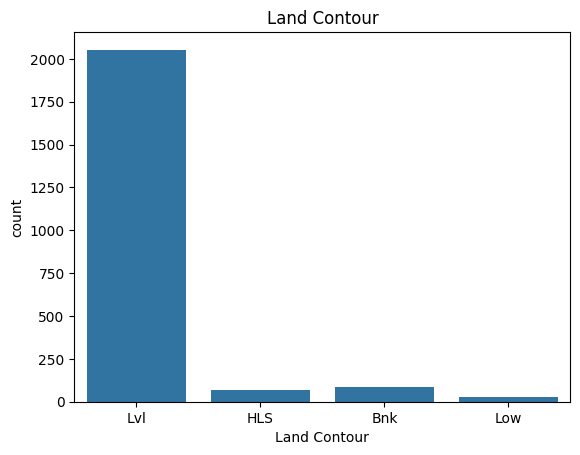

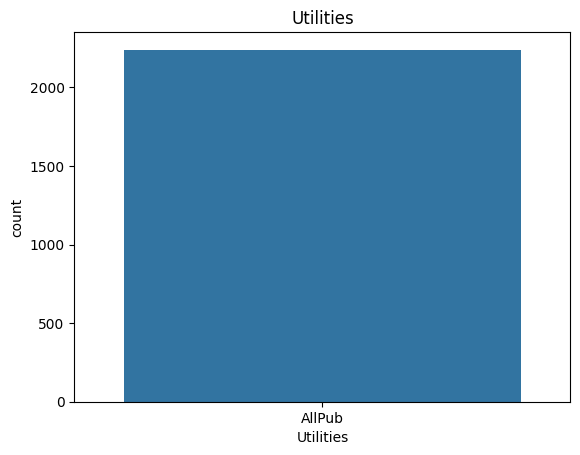

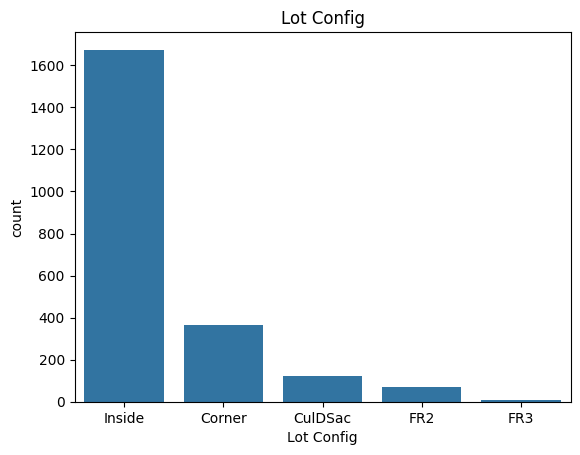

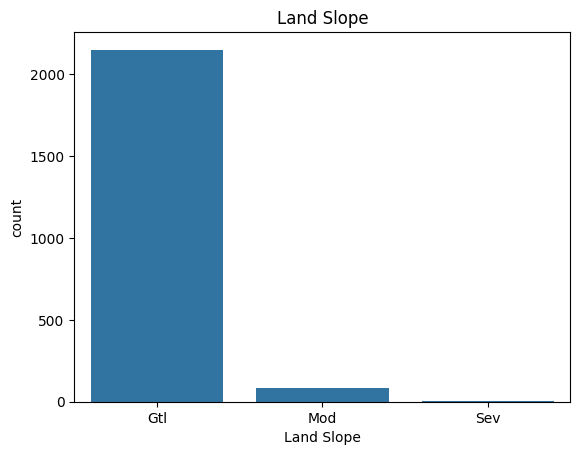

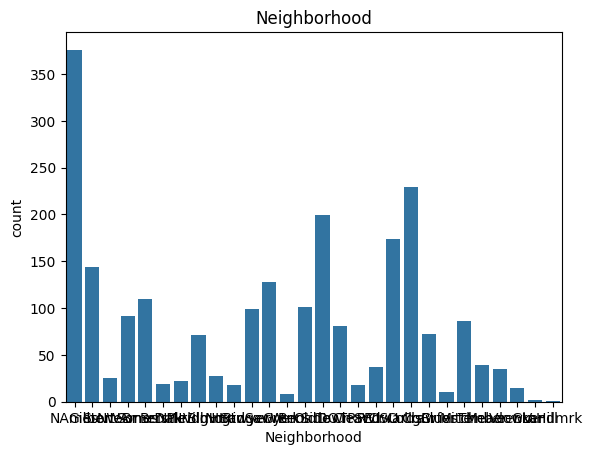

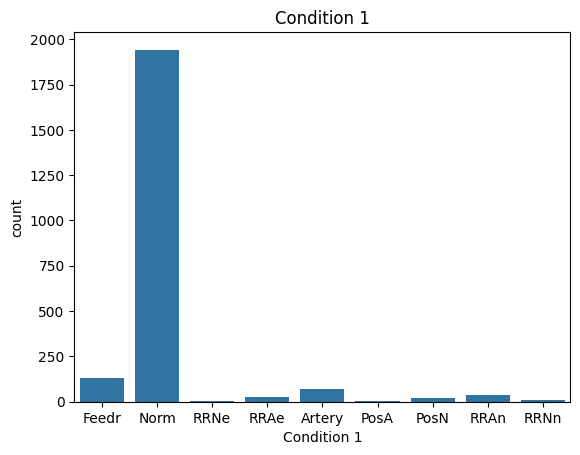

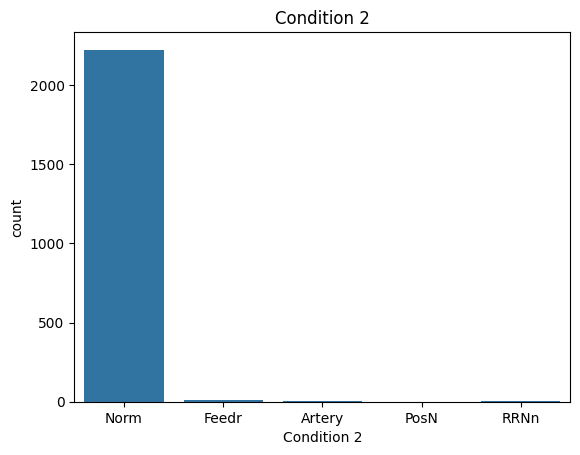

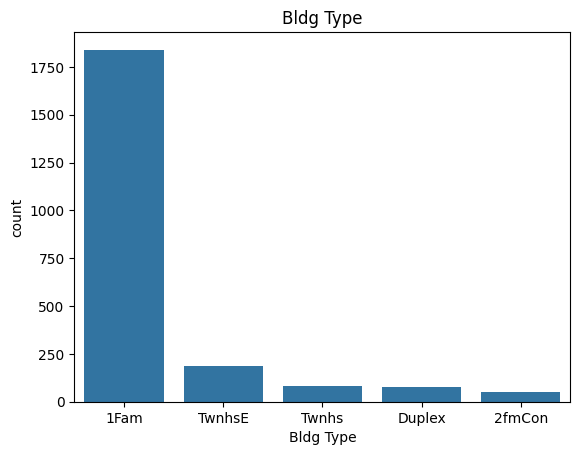

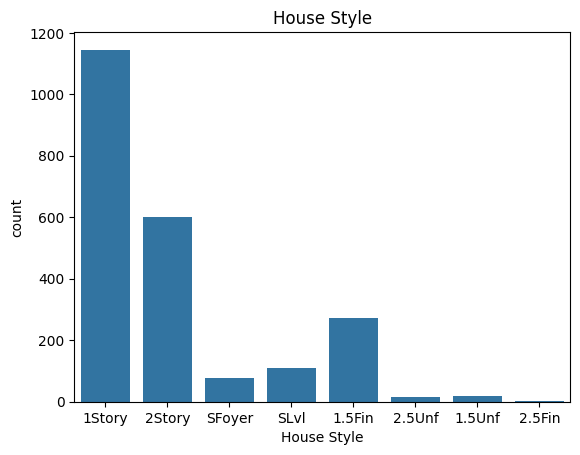

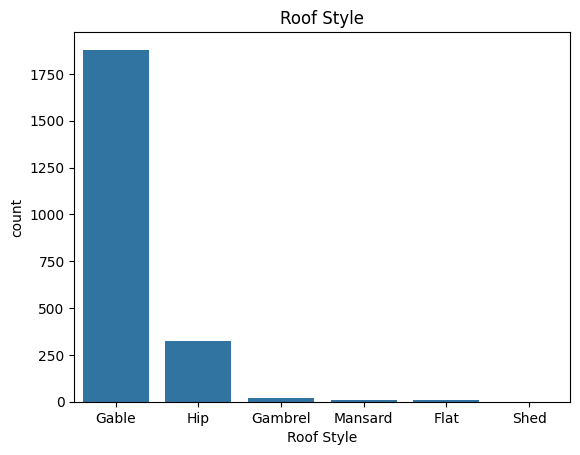

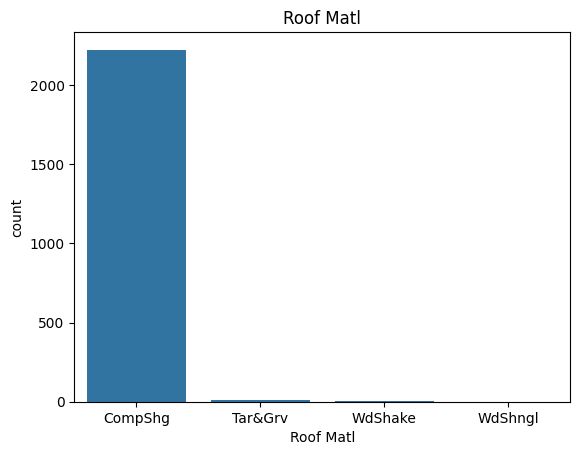

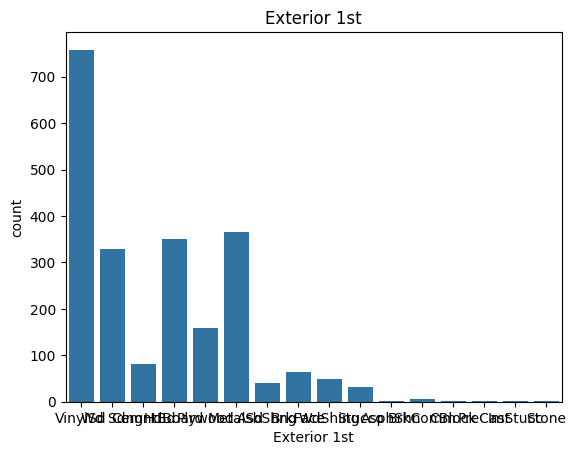

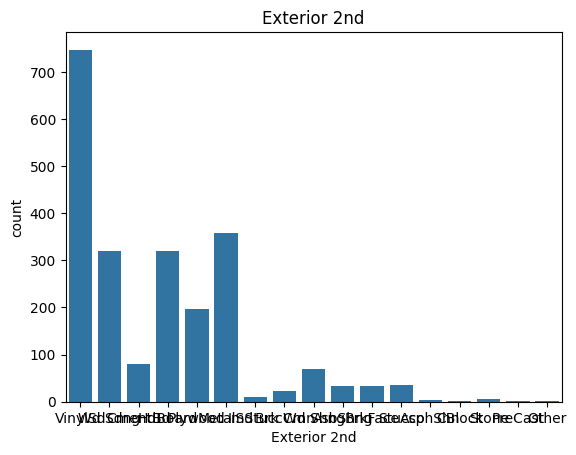

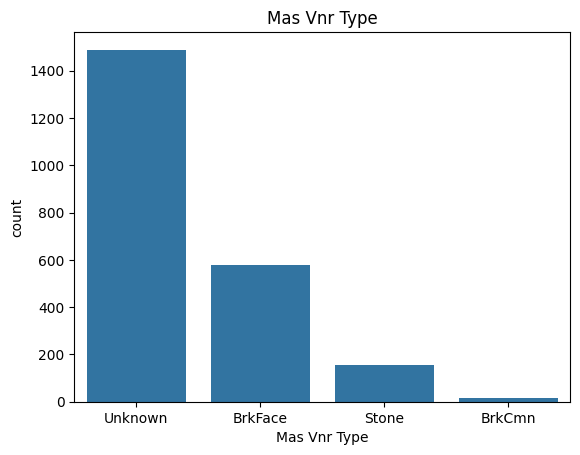

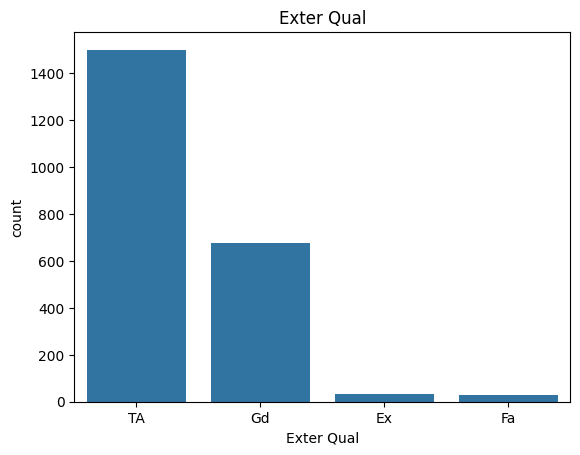

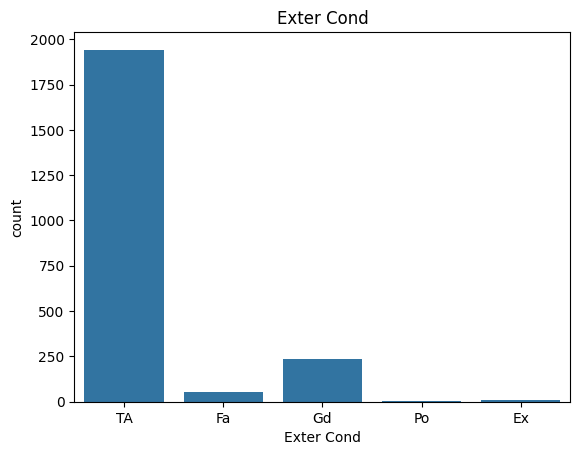

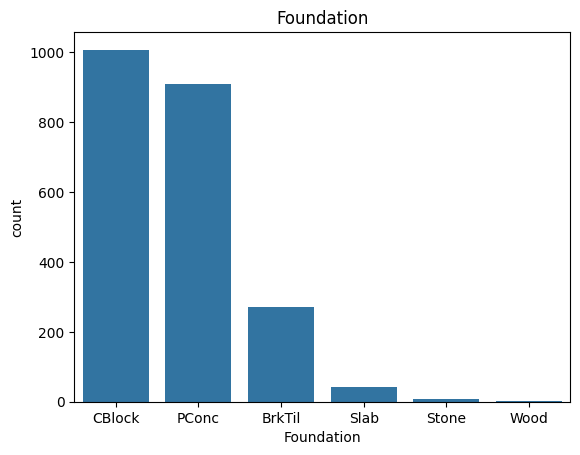

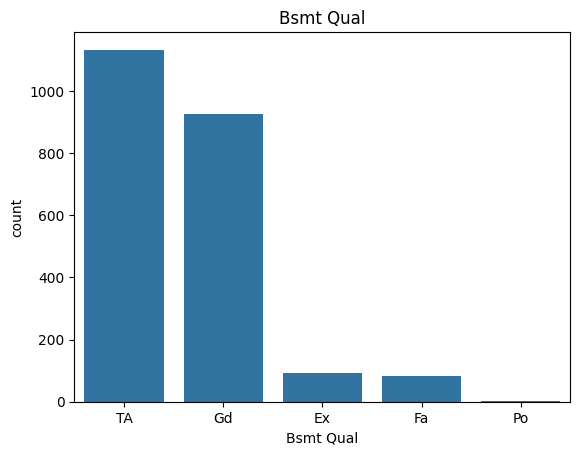

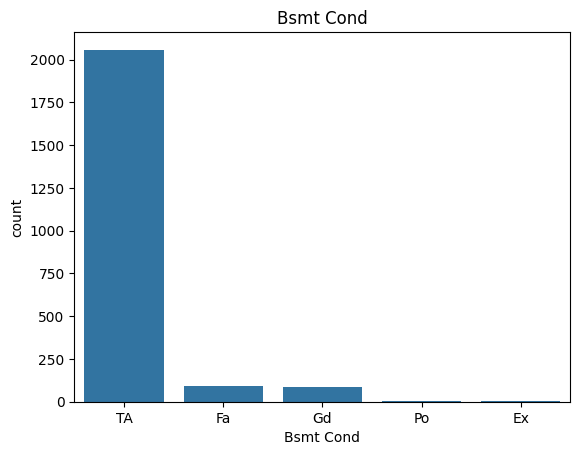

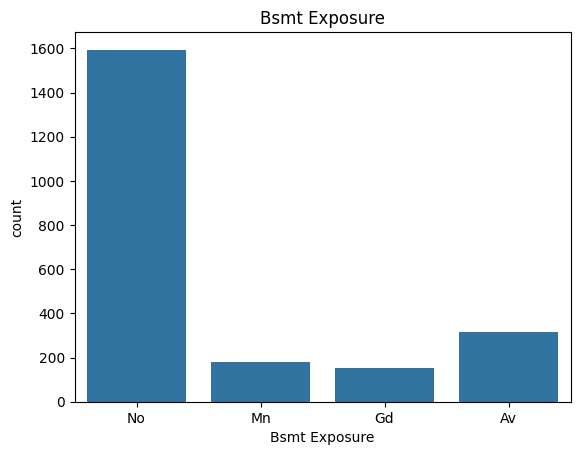

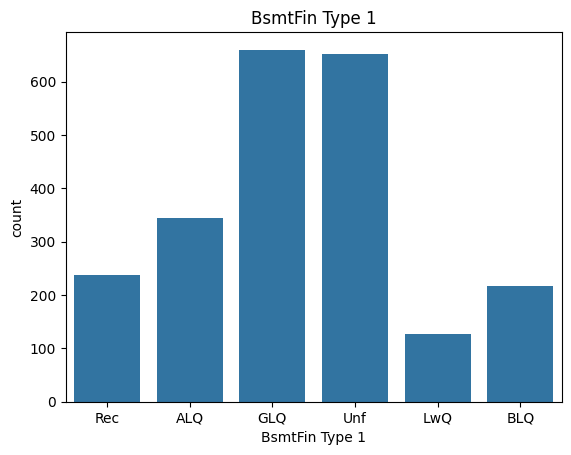

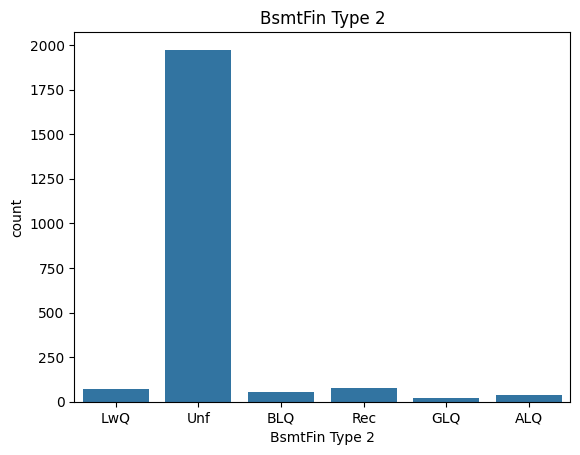

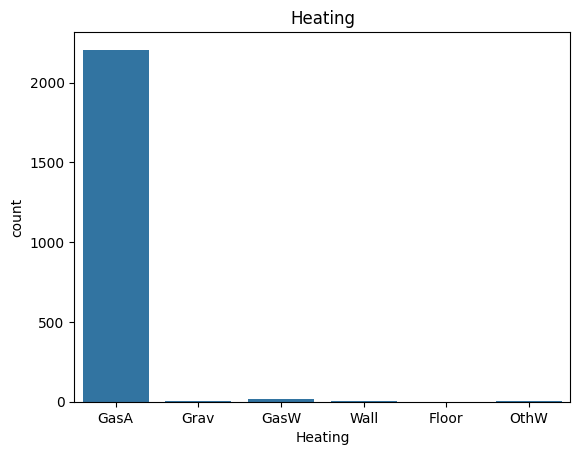

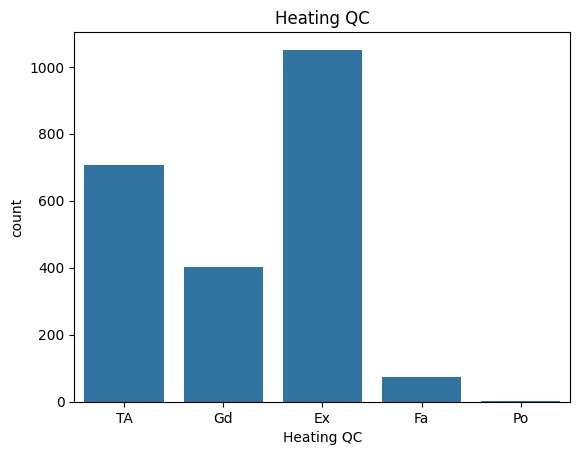

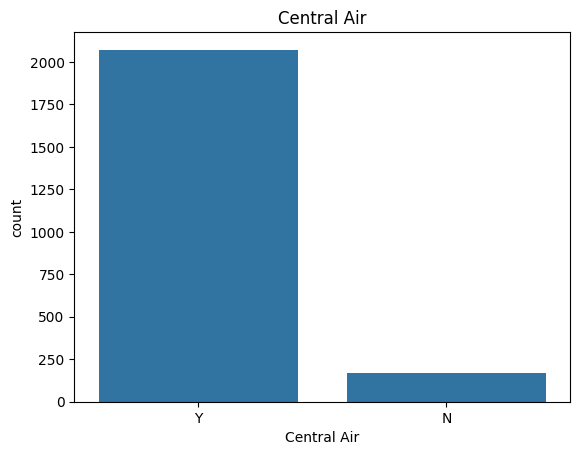

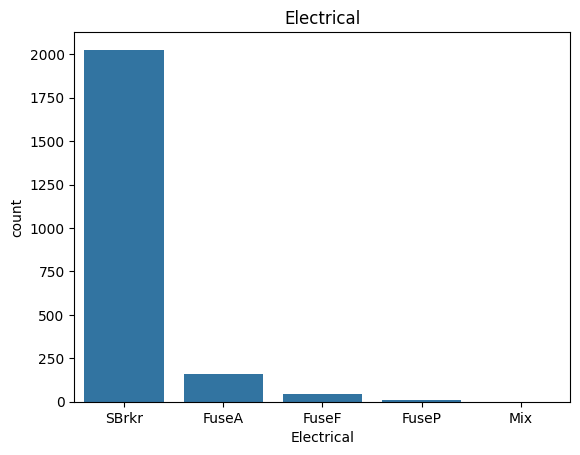

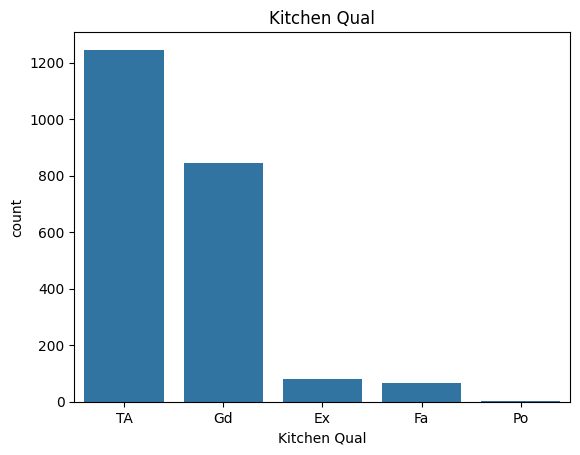

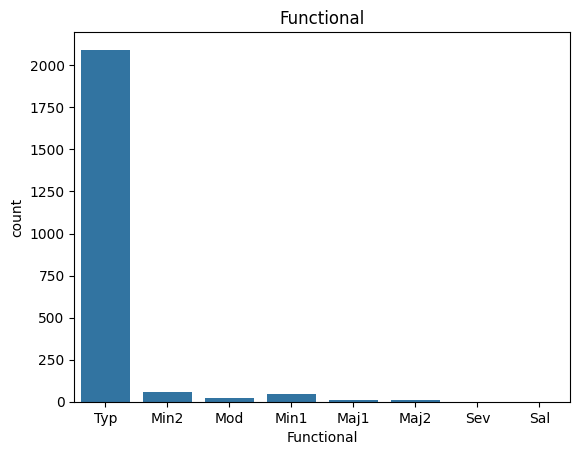

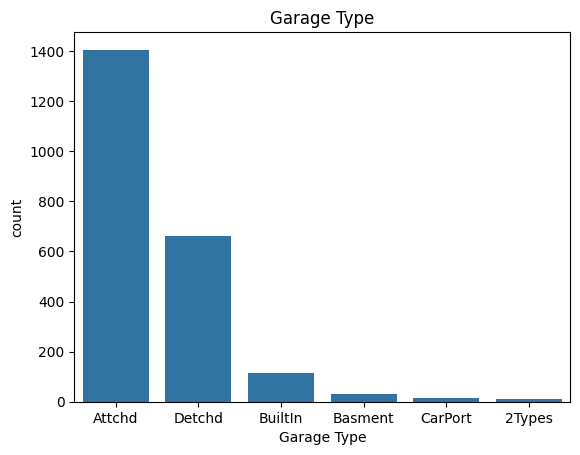

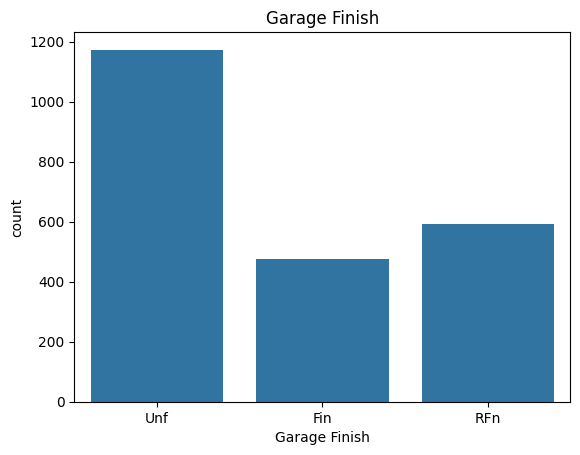

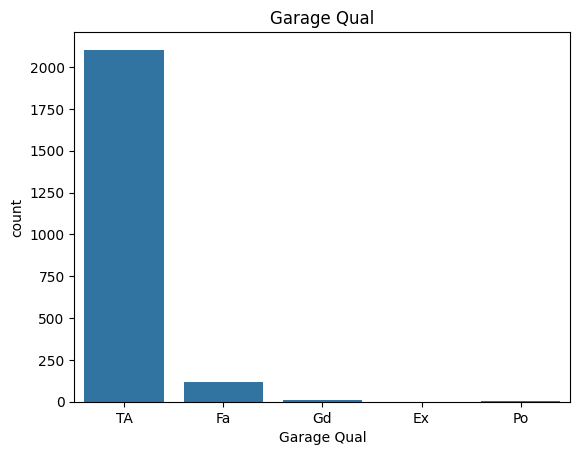

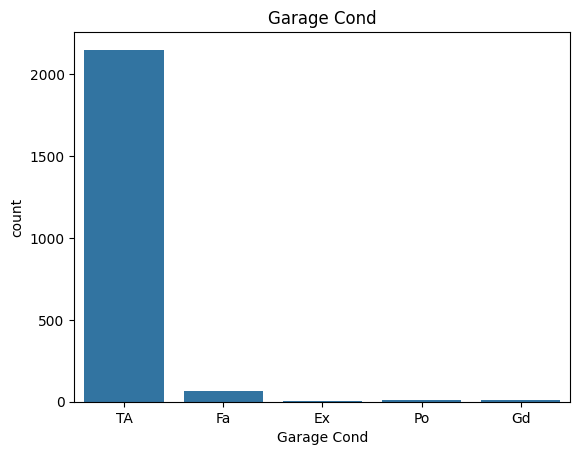

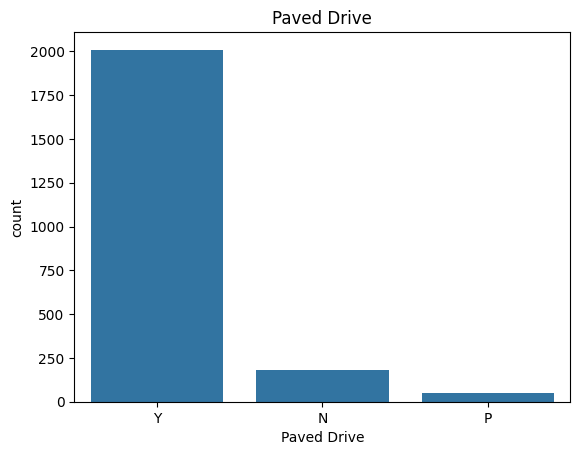

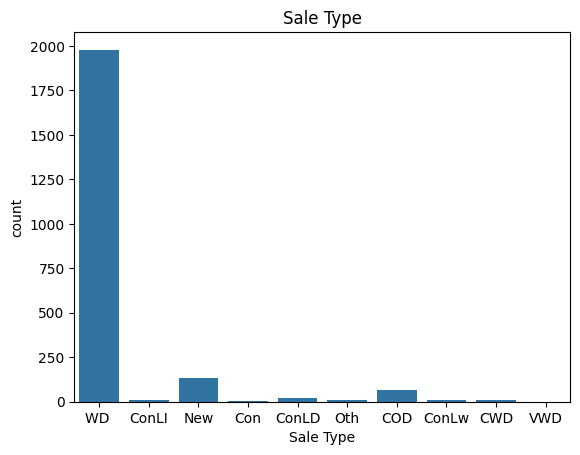

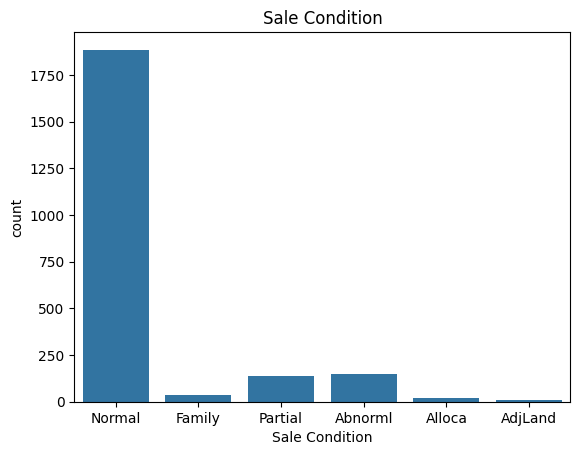

In [10]:
for colname in obj_cols:
    plt.title(colname)
    sns.countplot(x=df[colname])
    plt.show()

In [111]:
df = pd.read_csv('datasets/without-ols.csv')

In [112]:
df['MS Zoning'].value_counts()

MS Zoning
RL         1716
RM          398
FV           81
C (all)      22
RH           21
A (agr)       1
Name: count, dtype: int64

In [113]:
df['MS Zoning'] = df['MS Zoning'].map({'RL': 'RL', 'RM': 'RM', 'FV': 'other', 'FV': 'other', 'C (all)': 'other', 'A (agr)': 'other'})

In [114]:
df['Street'].value_counts()

Street
Pave    2232
Grvl       7
Name: count, dtype: int64

In [115]:
df['Street_pave'] = df['Street'].map({'Pave': 1, 'Grvl': 0})
df['Street_pave'].head()

0    1
1    1
2    1
3    1
4    1
Name: Street_pave, dtype: int64

In [116]:
df.drop('Street', axis=1, inplace=True)

In [117]:
df['Lot Shape'].value_counts()

Lot Shape
Reg    1505
IR1     680
IR2      49
IR3       5
Name: count, dtype: int64

In [118]:
df['Lot Shape_Reg'] = df['Lot Shape'].map({'Reg': 1, 'IR1': 0, 'IR2': 0, 'IR3': 0})
df.drop('Lot Shape', axis=1, inplace=True)
df['Lot Shape_Reg'].head(3)

0    1
1    0
2    0
Name: Lot Shape_Reg, dtype: int64

In [119]:
df['Lot Shape_Reg'].head(3)

0    1
1    0
2    0
Name: Lot Shape_Reg, dtype: int64

In [120]:
df['Land Contour'] = df['Land Contour'].map({'Lvl': 3, 'HLS': 2, 'Bnk': 2, 'Low': 1})

In [121]:
df['Utilities'] = df['Utilities'].map({'AllPub': 1})

In [122]:
df['Utilities'].value_counts()

Utilities
1    2239
Name: count, dtype: int64

<Axes: xlabel='Lot Config', ylabel='SalePrice'>

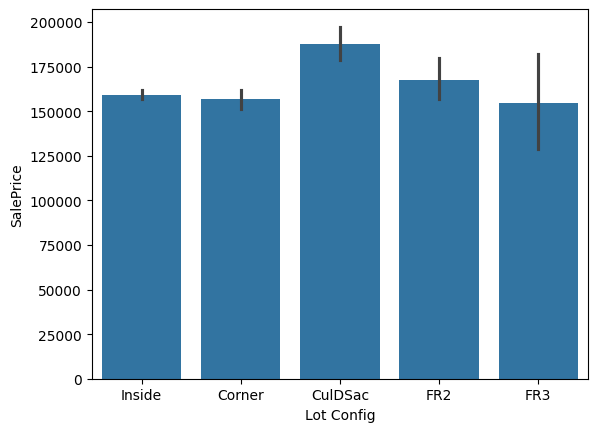

In [123]:
sns.barplot(data=df, x='Lot Config', y='SalePrice')

In [124]:
df['Lot Config'].value_counts()

Lot Config
Inside     1674
Corner      367
CulDSac     120
FR2          68
FR3          10
Name: count, dtype: int64

In [125]:
df.shape

(2239, 72)

In [128]:
df.dropna(inplace=True)

In [130]:
df = pd.concat([df, pd.get_dummies(df['Lot Config'], drop_first=True).astype(int)], axis=1)
df.drop('Lot Config', axis=1, inplace=True)

<Axes: xlabel='Land Slope', ylabel='SalePrice'>

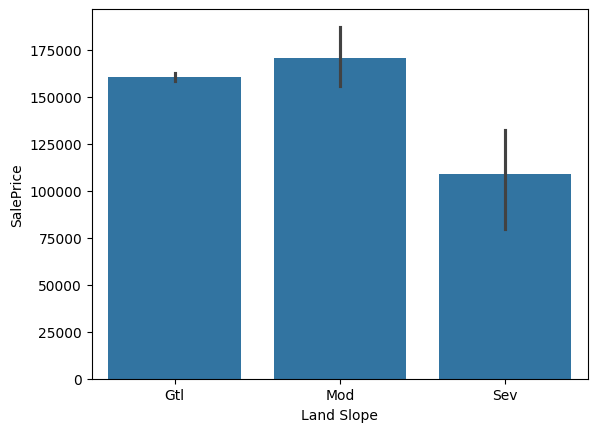

In [131]:
sns.barplot(data=df, x='Land Slope', y='SalePrice')

In [133]:
df = pd.concat([df, pd.get_dummies(df['Land Slope'], drop_first=True).astype(int)], axis=1)
df.drop('Land Slope', axis=1, inplace=True)

In [134]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      369
CollgCr    229
OldTown    199
Edwards    172
Gilbert    144
Sawyer     128
Somerst    110
BrkSide    101
SawyerW     95
NWAmes      92
Mitchel     86
IDOTRR      81
NridgHt     71
Crawfor     71
Timber      39
MeadowV     35
SWISU       31
Blmngtn     28
StoneBr     25
NPkVill     22
BrDale      19
NoRidge     18
ClearCr     18
Veenker     15
Blueste     10
Greens       8
GrnHill      2
Name: count, dtype: int64

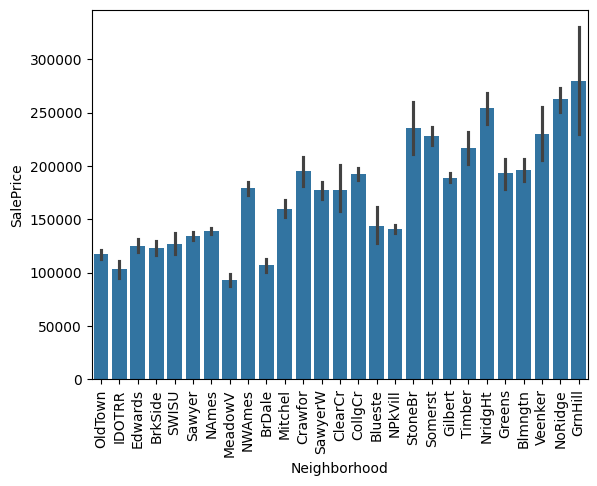

In [135]:
data = df[['Neighborhood', 'SalePrice']]
data = data.sort_values(by='SalePrice', ascending=True)
sns.barplot(data=data, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

In [136]:
df = pd.concat([df, pd.get_dummies(df['Neighborhood'], drop_first=True).astype(int)], axis=1)
df.drop('Neighborhood', axis=1, inplace=True)

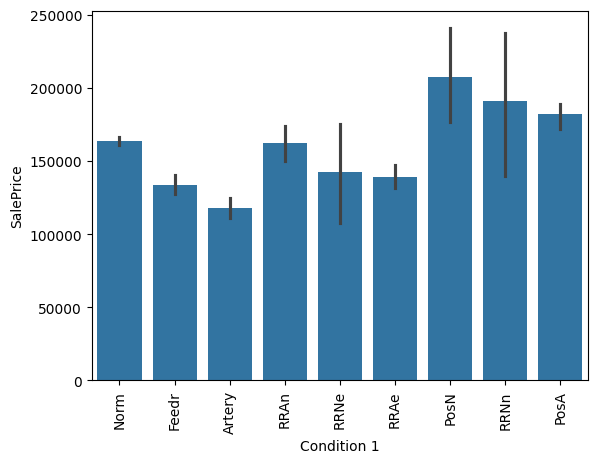

In [137]:
data = df[['Condition 1', 'SalePrice']]
data = data.sort_values(by='SalePrice', ascending=True)
sns.barplot(data=data, x='Condition 1', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

In [138]:
df['Condition 1'].value_counts()

Condition 1
Norm      1927
Feedr      125
Artery      66
RRAn        37
RRAe        25
PosN        19
RRNn         7
RRNe         6
PosA         6
Name: count, dtype: int64

In [139]:
df = pd.concat([df, pd.get_dummies(df['Condition 1'], drop_first=True).astype(int)], axis=1)
df.drop('Condition 1', axis=1, inplace=True)

In [140]:
obj_cols.index('Condition 1')

8

In [141]:
obj_cols[9:]

['Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [142]:
for colname in obj_cols[9:]:
    df = pd.concat([df, pd.get_dummies(df[colname], drop_first=True).astype(int)], axis=1)
    df.drop(colname, axis=1, inplace=True)

df.shape

(2218, 225)

In [143]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Land Contour,Utilities,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,ConLw,New,Oth,VWD,WD,AdjLand,Alloca,Family,Normal,Partial
1,20,RL,81.0,14267,3,1,6,6,1958,1958,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,74.0,13830,3,1,5,5,1997,1998,...,0,0,0,0,1,0,0,0,1,0
3,60,RL,78.0,9978,3,1,6,6,1998,1998,...,0,0,0,0,1,0,0,0,1,0
4,120,RL,41.0,4920,3,1,8,5,2001,2001,...,0,0,0,0,1,0,0,0,1,0
5,120,RL,43.0,5005,2,1,8,5,1992,1992,...,0,0,0,0,1,0,0,0,1,0


In [145]:
df.drop('MS Zoning', axis=1, inplace=True)

In [147]:
pd.set_option('display.max_columns', None)

In [148]:
df.loc[:2, :]

,MS SubClass,Lot Frontage,Lot Area,Land Contour,Utilities,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,BsmtFin SF 2_0,Low Qual Fin SF_0,Street_pave,Lot Shape_Reg,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosN,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,PreCast,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,Stone,Unknown,Fa,Gd,TA,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,Po,TA,Fa,Gd,Po,TA,Gd,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,Po,TA,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,VWD,WD,AdjLand,Alloca,Family,Normal,Partial
1,20,81.0,14267,3,1,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,6,2010,172000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,3,1,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,3,2010,189900,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [149]:
df.to_csv('datasets/encoded-unscaled.csv', index=False)